In [1]:

# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
import pandas as pd
import numpy as np
from prophet import Prophet
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error, mean_squared_error
import calendar
from datetime import datetime
from prophet.diagnostics import performance_metrics



/home/sam/Documents/projects/practice/general/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### For Cluster 0

In [2]:
def change_date_format(date_string, new_format):

    parts = date_string.split('/')
    if len(parts) != 3:
        parts = date_string.split('-')
    if len(parts) != 3:
        print("Error: Invalid date format")
        return None

    try:
        for i in parts:
            if int(i) > 40:
                year = int(i)
            
        
        month = int(parts[1])

        

        # Create a new datetime object with the adjusted day value
        # days_in_month = calendar.monthrange(year, month)[1]
        date = datetime(year, month, 1)

        # Convert the new datetime object to the desired format
        new_date_string = date.strftime(new_format)
        return new_date_string
    except (ValueError, OverflowError) as e:
        print(f"Error: {e}")
        return None

In [4]:
def fb_prohet(path):
    df = read_csv(path, header=0)

    # prepare expected column names
    df.columns = ['ds', 'y']
    df['ds'] = df.apply(lambda x: change_date_format(x.ds, '%Y-%m-%d'), axis=1)

    # create test dataset, remove last 3 months
    train = df.drop(df.index[-3:])
    print(train.tail())
    # define the model
    model = Prophet()
    # fit the model
    model.fit(train)
    # define the period for which we want a prediction
    future = list()
    for i in range(1, 4):
        date = '2016-%01d' % i
        future.append([date])
    future = DataFrame(future)
    future.columns = ['ds']
    future['ds'] = to_datetime(future['ds'])
    # use the model to make a forecast
    forecast = model.predict(future)
    # calculate MAE between expected and predicted values for december
    y_true = df['y'][-3:].values
    y_pred = forecast['yhat'].values
    mae = mean_absolute_error(y_true, y_pred)
    print('MAE: %.3f' % mae)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print('RMSE: %.3f' % rmse)
    # plot expected vs actual
    pyplot.plot(y_true, label='Actual')
    pyplot.plot(y_pred, label='Predicted')
    pyplot.legend()
    pyplot.show()

13:55:31 - cmdstanpy - INFO - Chain [1] start processing
13:55:31 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
40  2015-05-01   745
41  2015-06-01  1312
42  2015-07-01   351
43  2015-08-01  1475
44  2015-09-01  1000
MAE: 727.350
RMSE: 866.930


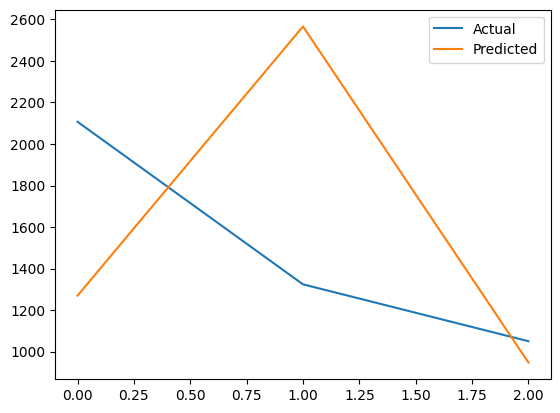

In [5]:
fb_prohet('../data/single bill for cluster 0.csv')


13:57:59 - cmdstanpy - INFO - Chain [1] start processing
13:57:59 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
40  2015-05-01  1306
41  2015-06-01  1526
42  2015-07-01  1505
43  2015-08-01  1038
44  2015-09-01   614
MAE: 558.796
RMSE: 626.819


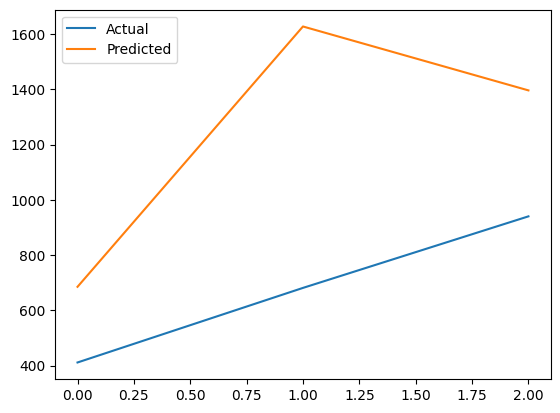

In [6]:
fb_prohet('../data/single bill cluster 00.csv')


13:58:00 - cmdstanpy - INFO - Chain [1] start processing
13:58:00 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
40  2015-05-01   920
41  2015-06-01   608
42  2015-07-01   246
43  2015-08-01   740
44  2015-09-01  2427
MAE: 912.507
RMSE: 919.271


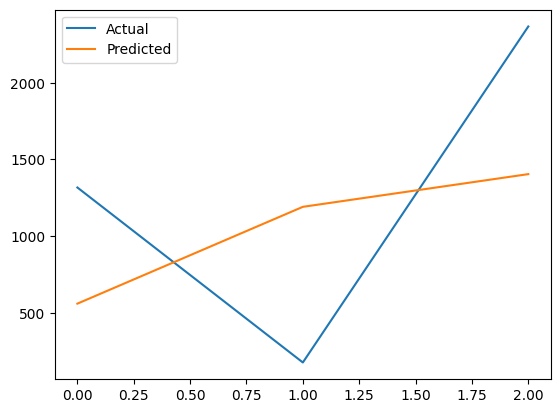

In [7]:
fb_prohet('../data/single bill cluster 000.csv')


13:58:00 - cmdstanpy - INFO - Chain [1] start processing
13:58:00 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
40  2015-05-01  2336
41  2015-06-01  1753
42  2015-07-01  1221
43  2015-08-01   573
44  2015-09-01  2171
MAE: 440.326
RMSE: 442.532


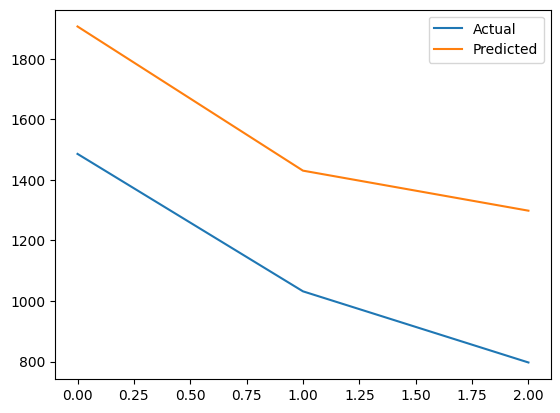

In [8]:
fb_prohet('../data/single bill cluster 0000.csv')


13:58:01 - cmdstanpy - INFO - Chain [1] start processing
13:58:01 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
40  2015-05-01   838
41  2015-06-01  1148
42  2015-07-01  1166
43  2015-08-01  1053
44  2015-09-01  1182
MAE: 612.565
RMSE: 761.634


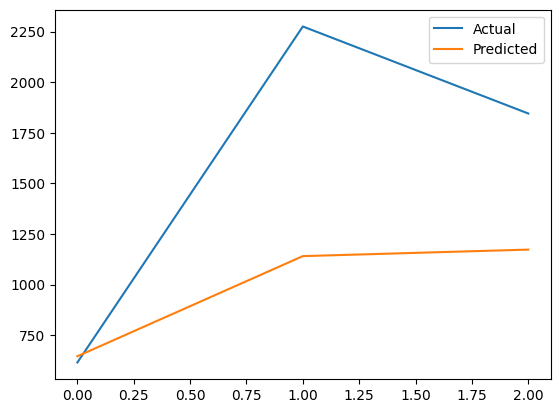

In [9]:
fb_prohet('../data/single bill cluster 00000.csv')

### For Clustring 1

13:59:58 - cmdstanpy - INFO - Chain [1] start processing


13:59:58 - cmdstanpy - INFO - Chain [1] done processing


            ds    y
40  2015-05-01  407
41  2015-06-01   72
42  2015-07-01   75
43  2015-08-01  116
44  2015-09-01  454
MAE: 181.148
RMSE: 181.315


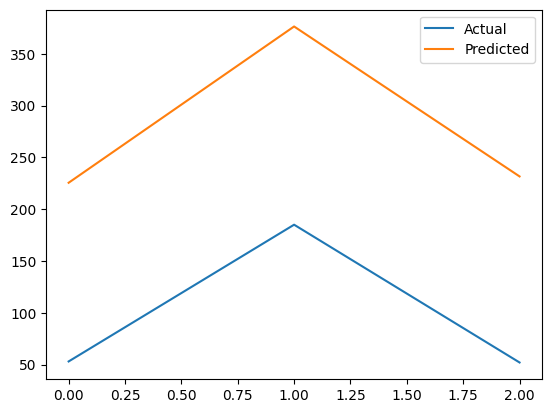

In [10]:
fb_prohet('../data/single bill for cluster 1.csv')


14:00:06 - cmdstanpy - INFO - Chain [1] start processing
14:00:06 - cmdstanpy - INFO - Chain [1] done processing


            ds    y
40  2015-05-01  129
41  2015-06-01  209
42  2015-07-01  408
43  2015-08-01  208
44  2015-09-01  491
MAE: 212.209
RMSE: 238.292


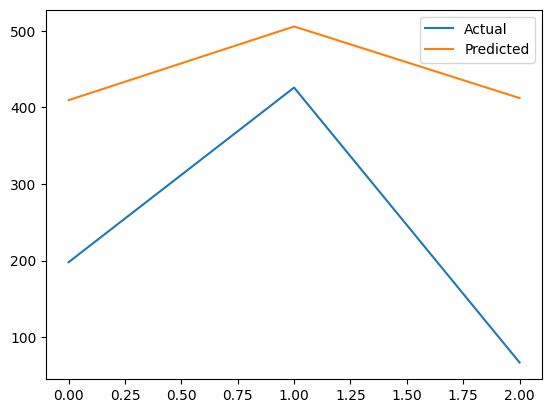

In [11]:
fb_prohet('../data/single bill culster 11.csv')


14:00:18 - cmdstanpy - INFO - Chain [1] start processing
14:00:18 - cmdstanpy - INFO - Chain [1] done processing


            ds    y
40  2015-05-01  316
41  2015-06-01  439
42  2015-07-01  444
43  2015-08-01   75
44  2015-09-01  424
MAE: 126.812
RMSE: 133.564


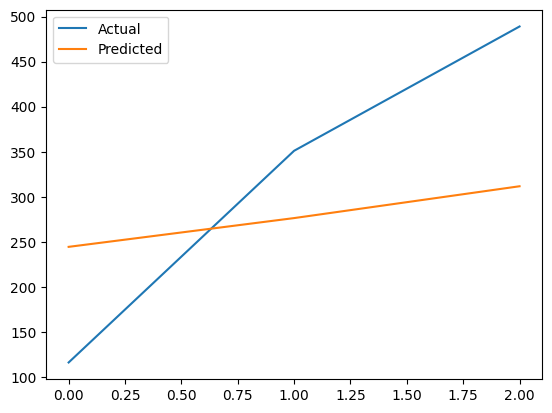

In [12]:
fb_prohet('../data/single bill culster 111.csv')


14:00:28 - cmdstanpy - INFO - Chain [1] start processing
14:00:28 - cmdstanpy - INFO - Chain [1] done processing


            ds    y
40  2015-05-01  324
41  2015-06-01  295
42  2015-07-01  119
43  2015-08-01  328
44  2015-09-01  495
MAE: 133.549
RMSE: 161.798


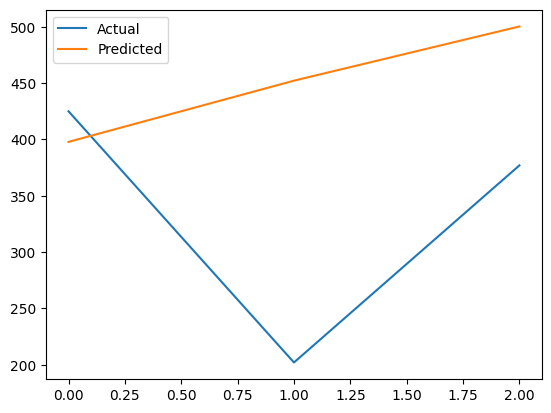

In [13]:
fb_prohet('../data/single bill for cluster 1111.csv')


14:00:33 - cmdstanpy - INFO - Chain [1] start processing
14:00:33 - cmdstanpy - INFO - Chain [1] done processing


            ds    y
40  2015-05-01  495
41  2015-06-01  278
42  2015-07-01  355
43  2015-08-01  383
44  2015-09-01  109
MAE: 60.151
RMSE: 84.448


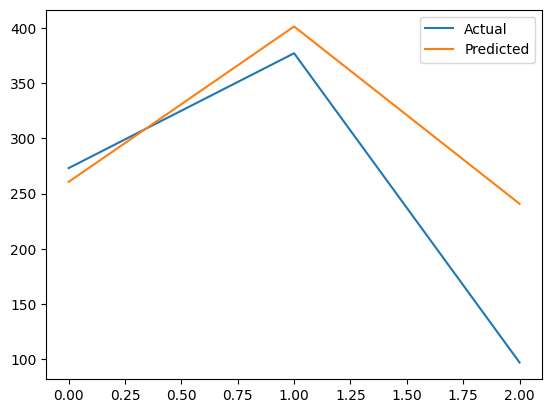

In [14]:
fb_prohet('../data/single bill culster 11111.csv')

### For cluster 2

14:02:18 - cmdstanpy - INFO - Chain [1] start processing


14:02:18 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
40  2015-05-01  3284
41  2015-06-01  2908
42  2015-07-01  2120
43  2015-08-01  2855
44  2015-09-01  3262
MAE: 379.117
RMSE: 447.362


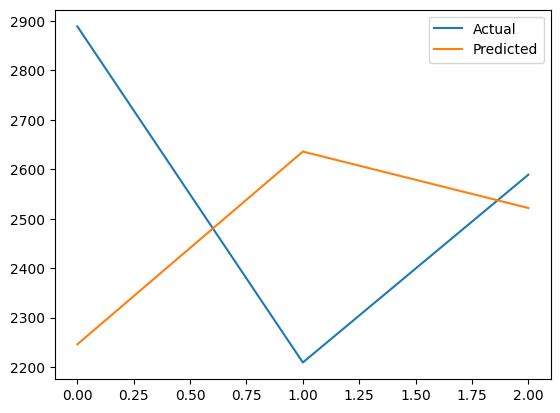

In [15]:
fb_prohet('../data/single bill for cluster 2.csv .csv')


14:02:30 - cmdstanpy - INFO - Chain [1] start processing
14:02:30 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
40  2015-05-01  2285
41  2015-06-01  3632
42  2015-07-01  2241
43  2015-08-01  2421
44  2015-09-01  3223
MAE: 451.019
RMSE: 550.285


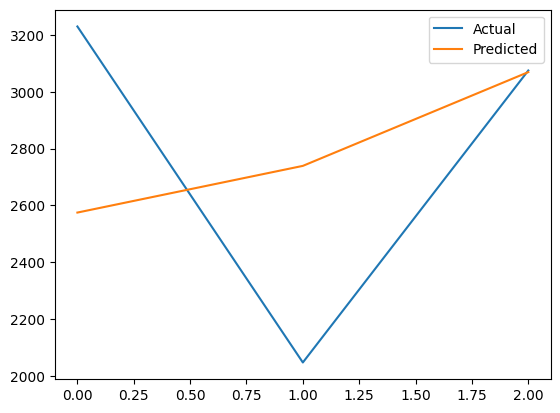

In [16]:
fb_prohet('../data/single bill culster 22.csv')


14:02:41 - cmdstanpy - INFO - Chain [1] start processing
14:02:41 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
40  2015-05-01  2422
41  2015-06-01  2397
42  2015-07-01  3792
43  2015-08-01  3250
44  2015-09-01  2415
MAE: 1380.690
RMSE: 1386.299


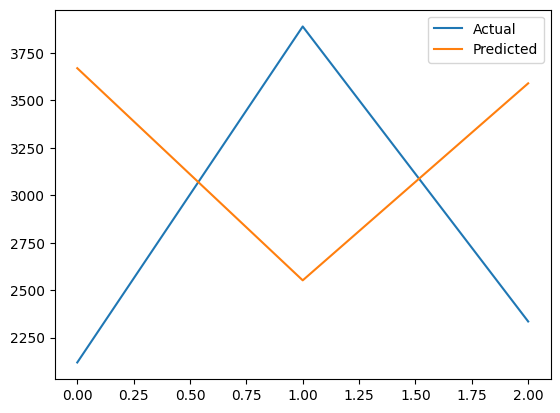

In [17]:
fb_prohet('../data/single bill culster 222.csv')


14:02:42 - cmdstanpy - INFO - Chain [1] start processing
14:02:42 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
40  2015-05-01  3811
41  2015-06-01  3551
42  2015-07-01  3939
43  2015-08-01  2734
44  2015-09-01  3602
MAE: 538.968
RMSE: 604.992


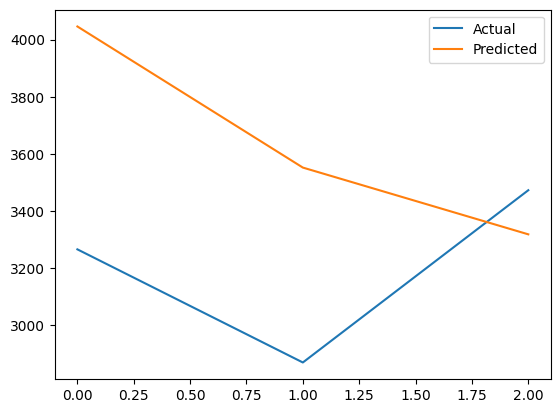

In [18]:
fb_prohet('../data/single bill culster 2222.csv')


14:02:44 - cmdstanpy - INFO - Chain [1] start processing
14:02:44 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
40  2015-05-01  3188
41  2015-06-01  3364
42  2015-07-01  3489
43  2015-08-01  3409
44  2015-09-01  3704
MAE: 677.545
RMSE: 823.987


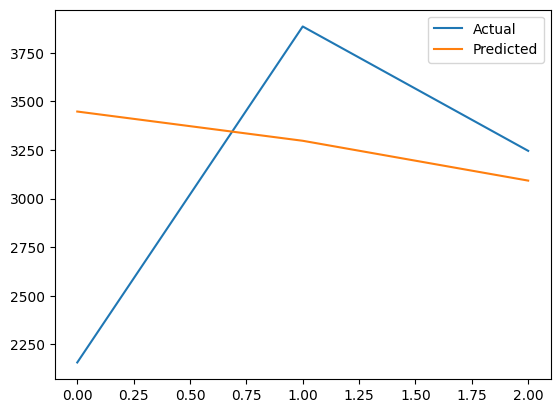

In [19]:
fb_prohet('../data/single bill cluster 22222.csv')